In [34]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import KNNImputer

from scipy import stats
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report, roc_curve, plot_roc_curve, confusion_matrix
from sklearn.naive_bayes import GaussianNB

In [35]:
# !pip install session-info
import session_info
session_info.show()

In [36]:
df = pd.read_csv("loan data.csv")
# changing the columns to lower case for ease of use
df.columns = df.columns.str.lower()
df_work = df.copy()

## Reading the samples of the data

In [37]:
df_work.sample(10)

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
441,LP002409,Male,Yes,0,Graduate,No,7901,1833.0,180.0,360.0,1.0,Rural,Y
137,LP001491,Male,Yes,2,Graduate,Yes,3316,3500.0,88.0,360.0,1.0,Urban,Y
337,LP002112,Male,Yes,2,Graduate,Yes,2500,4600.0,176.0,360.0,1.0,Rural,Y
179,LP001630,Male,No,0,Not Graduate,No,2333,1451.0,102.0,480.0,0.0,Urban,N
516,LP002670,Female,Yes,2,Graduate,No,2031,1632.0,113.0,480.0,1.0,Semiurban,Y
351,LP002140,Male,No,0,Graduate,No,8750,4167.0,308.0,360.0,1.0,Rural,N
473,LP002522,Female,No,0,Graduate,Yes,2500,0.0,93.0,360.0,NaN,Urban,Y
370,LP002194,Female,No,0,Graduate,Yes,15759,0.0,55.0,360.0,1.0,Semiurban,Y
239,LP001792,Male,Yes,1,Graduate,No,3315,0.0,96.0,360.0,1.0,Semiurban,Y
542,LP002753,Female,No,1,Graduate,NaN,3652,0.0,95.0,360.0,1.0,Semiurban,Y


In [38]:
## Getting the information of the datatypes in the given dataframe
df_work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            614 non-null    object 
 1   gender             601 non-null    object 
 2   married            611 non-null    object 
 3   dependents         599 non-null    object 
 4   education          614 non-null    object 
 5   self_employed      582 non-null    object 
 6   applicantincome    614 non-null    int64  
 7   coapplicantincome  614 non-null    float64
 8   loanamount         592 non-null    float64
 9   loan_amount_term   600 non-null    float64
 10  credit_history     564 non-null    float64
 11  property_area      614 non-null    object 
 12  loan_status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [39]:
count = 0
for x in list(map(lambda x:x.replace("_"," ").title(),df.columns)):
    count += 1
    print(f"{count}. {x}")

1. Loan Id
2. Gender
3. Married
4. Dependents
5. Education
6. Self Employed
7. Applicantincome
8. Coapplicantincome
9. Loanamount
10. Loan Amount Term
11. Credit History
12. Property Area
13. Loan Status


In [40]:
## Dropping loan_id
df_work.drop('loan_id',axis=1,inplace=True)

In [41]:
# Checking for Null values
df_work.isnull().sum()

gender               13
married               3
dependents           15
education             0
self_employed        32
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
dtype: int64

### Data Evaluation and Data Visualization

#### 1. Numerical Variables

In [42]:
df_description = df.describe()
df_description

,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


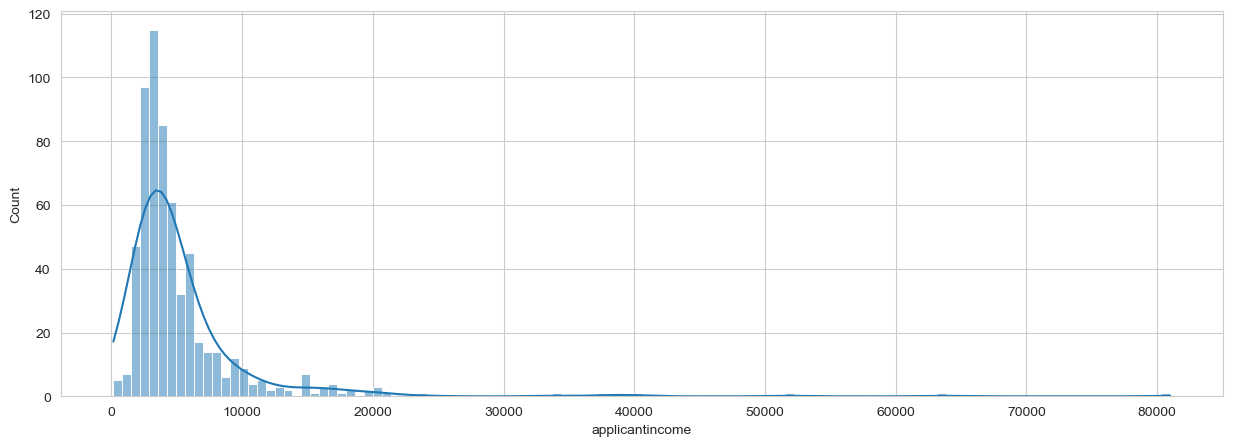

In [43]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 5))
sns.histplot(df['applicantincome'],kde=True)
plt.show()

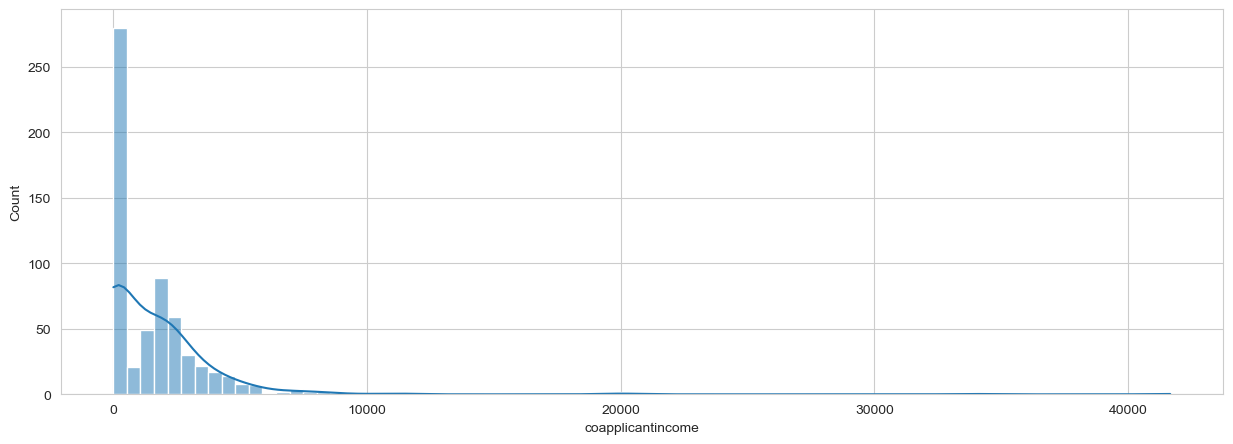

In [44]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 5))
sns.histplot(df['coapplicantincome'],kde=True)
plt.show()

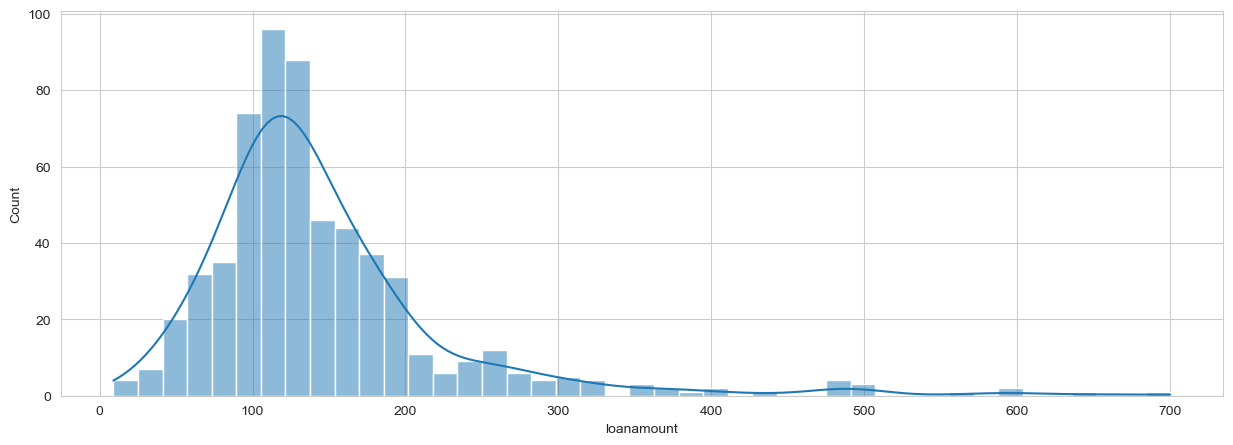

In [45]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 5))
sns.histplot(df['loanamount'],kde=True)
plt.show()

C:\Users\vaibh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


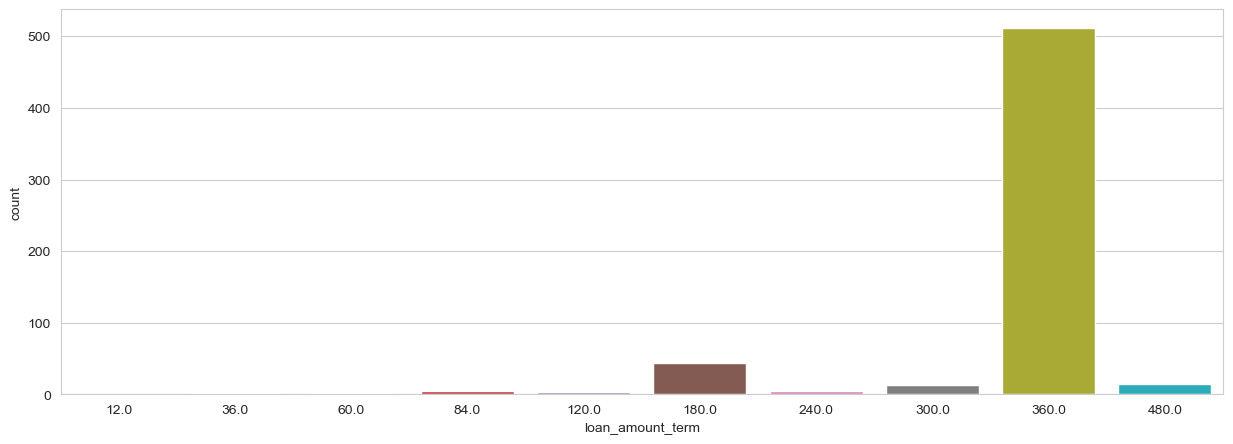

In [46]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 5))
sns.countplot(df['loan_amount_term'])
plt.show()

In [47]:
df['loan_amount_term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: loan_amount_term, dtype: int64

#### 2. Categorical Variables

In [48]:
# Categorical Distribution 
gender_dist = df['gender'].value_counts()
depend_dist =  df['dependents'].value_counts()
education_dist = df['education'].value_counts()
self_employed_dist = df['self_employed'].value_counts()
property_area_dist = df['property_area'].value_counts()
loan_status_dist = df['loan_status'].value_counts()

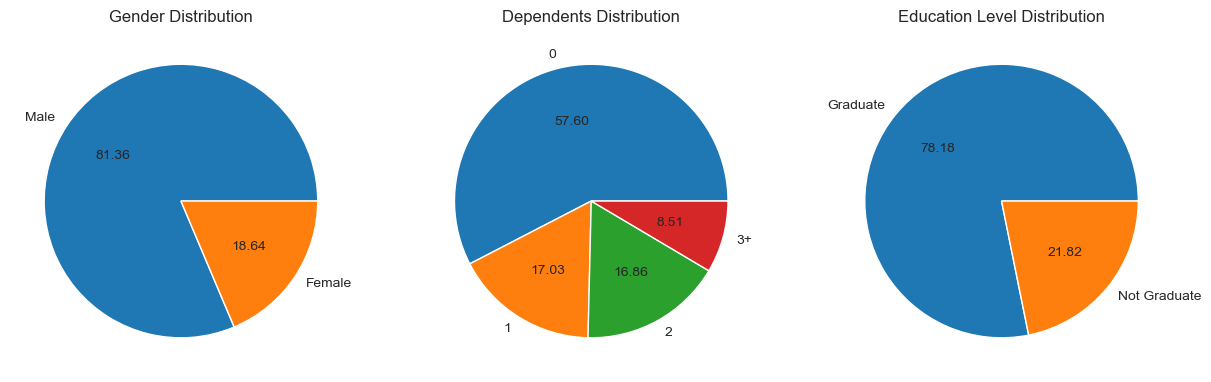

In [49]:
fig,((ax1,ax2,ax3)) = plt.subplots(1,3,figsize=(15,8))
# plt.figure()
ax1.pie(gender_dist.values,labels=gender_dist.index,autopct='%.2f')
ax1.set_title("Gender Distribution")
ax2.pie(depend_dist.values,labels=depend_dist.index,autopct='%.2f')
ax2.set_title("Dependents Distribution")
ax3.pie(education_dist.values,labels=education_dist.index,autopct='%.2f')
ax3.set_title("Education Level Distribution")
# ax4.pie(gender_dist.values,labels=gender_dist.index,autopct='%.2f')

plt.show()

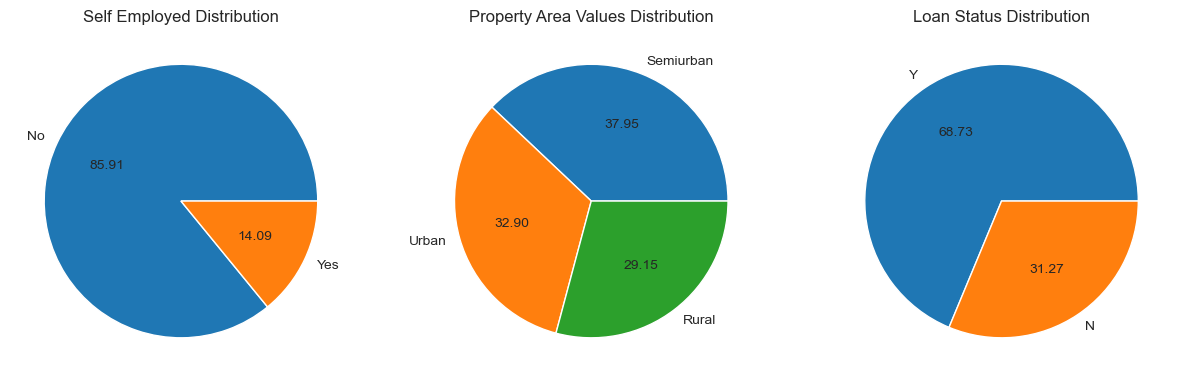

In [50]:
fig,((ax1,ax2,ax3)) = plt.subplots(1,3,figsize=(15,8))
# plt.figure()
ax1.pie(self_employed_dist.values,labels=self_employed_dist.index,autopct='%.2f')
ax1.set_title("Self Employed Distribution")
ax2.pie(property_area_dist.values,labels=property_area_dist.index,autopct='%.2f')
ax2.set_title("Property Area Values Distribution")
ax3.pie(loan_status_dist.values,labels=loan_status_dist.index,autopct='%.2f')
ax3.set_title("Loan Status Distribution")
# ax4.pie(gender_dist.values,labels=gender_dist.index,autopct='%.2f')

plt.show()

<AxesSubplot:xlabel='loan_status', ylabel='count'>

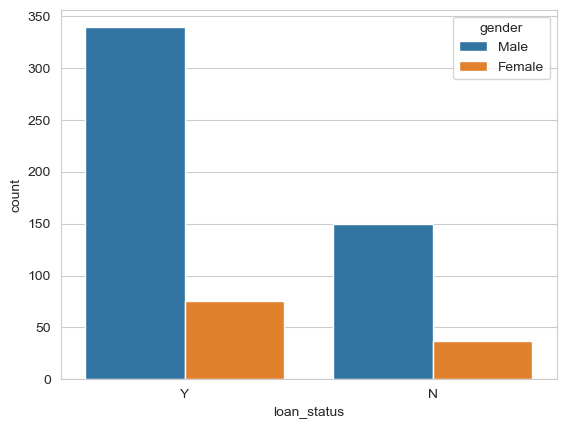

In [132]:
# Loan Approval Distriburion gender wise
sns.countplot(data=df,x='loan_status',hue='gender')

<AxesSubplot:xlabel='loan_status', ylabel='count'>

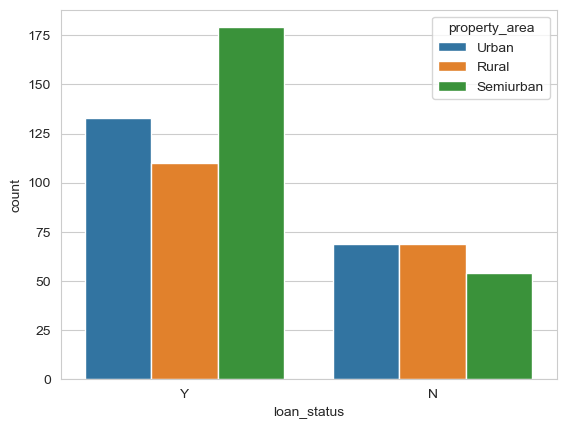

In [133]:
# Loan Approval Distriburion prpperty area wise
sns.countplot(data=df,x='loan_status',hue='property_area')

<AxesSubplot:xlabel='loan_status', ylabel='count'>

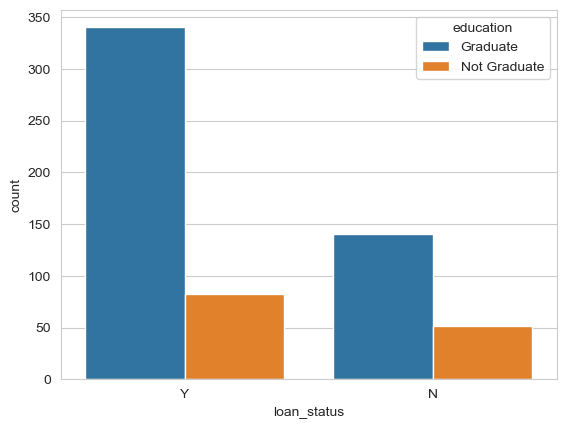

In [135]:
# Loan Approval Distriburion education wise
sns.countplot(data=df,x='loan_status',hue='education')


## Data Pre-Processing

#### Converting the string type categorical values to numerical values
<ol>
    <li>For that we first need to target the string columns.</li>
    <li>We will also need to know the number of categorical values in order to decide the type of encoding we need to perofrm.</li>
    <li>Then we will be create encoders in order to transform the string data to their respective numerical values.</li>
    <li>We can reuse the encoders to transform the future inputs into the model.</li>
</ol>


In [51]:
def get_cateogorical_strings(df:pd.DataFrame):
    dict_cats = {}
    for x in df.columns:
        if df[x].dtypes == "object":
            dict_cats[x] = df[x].nunique()
    return dict_cats

In [52]:
cat_lists = get_cateogorical_strings(df_work)

In [53]:
cat_lists.keys()

dict_keys(['gender', 'married', 'dependents', 'education', 'self_employed', 'property_area', 'loan_status'])

In [54]:
def encode_datarfame_categorical(df:pd.DataFrame,cat_dict:dict):
    encoder_dict = {}
    lsts = list(cat_dict.keys())
    for x in lsts:
        if cat_dict[x] < 10:
            encoder = LabelEncoder()
            df[x] = encoder.fit_transform(df[x])
            encoder_dict[x] = encoder
    return df,encoder_dict

In [55]:
df_work , cat_lists = encode_datarfame_categorical(df_work,cat_lists)

In [56]:
df_work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             614 non-null    int32  
 1   married            614 non-null    int32  
 2   dependents         614 non-null    int32  
 3   education          614 non-null    int32  
 4   self_employed      614 non-null    int32  
 5   applicantincome    614 non-null    int64  
 6   coapplicantincome  614 non-null    float64
 7   loanamount         592 non-null    float64
 8   loan_amount_term   600 non-null    float64
 9   credit_history     564 non-null    float64
 10  property_area      614 non-null    int32  
 11  loan_status        614 non-null    int32  
dtypes: float64(4), int32(7), int64(1)
memory usage: 40.9 KB


### Dealing with Null values

We will be using KNN imputer in order to fill the null values with their appropriate numerical values that are calculated by the nearest similar neighbouring values 

In [57]:
imputer = KNNImputer()
imputer_df = imputer.fit_transform(df_work)
imputer_df = pd.DataFrame(imputer_df,columns=df.drop('loan_id',axis=1).columns)

In [58]:
## Checking for null values
imputer_df.isnull().sum()

gender               0
married              0
dependents           0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
dtype: int64

In [59]:
outs_df = imputer_df.copy()

## Dealing for outliers

In [60]:
# first we need to target continuous values in the dataframe 
continuous_lists = [x for x in imputer_df.columns if x not in list(cat_lists.keys()) ]

In [61]:
imputer_df.loc[:,continuous_lists]

,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history
0,5849.0,0.0,147.8,360.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0
2,3000.0,0.0,66.0,360.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0
4,6000.0,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900.0,0.0,71.0,360.0,1.0
610,4106.0,0.0,40.0,180.0,1.0
611,8072.0,240.0,253.0,360.0,1.0
612,7583.0,0.0,187.0,360.0,1.0


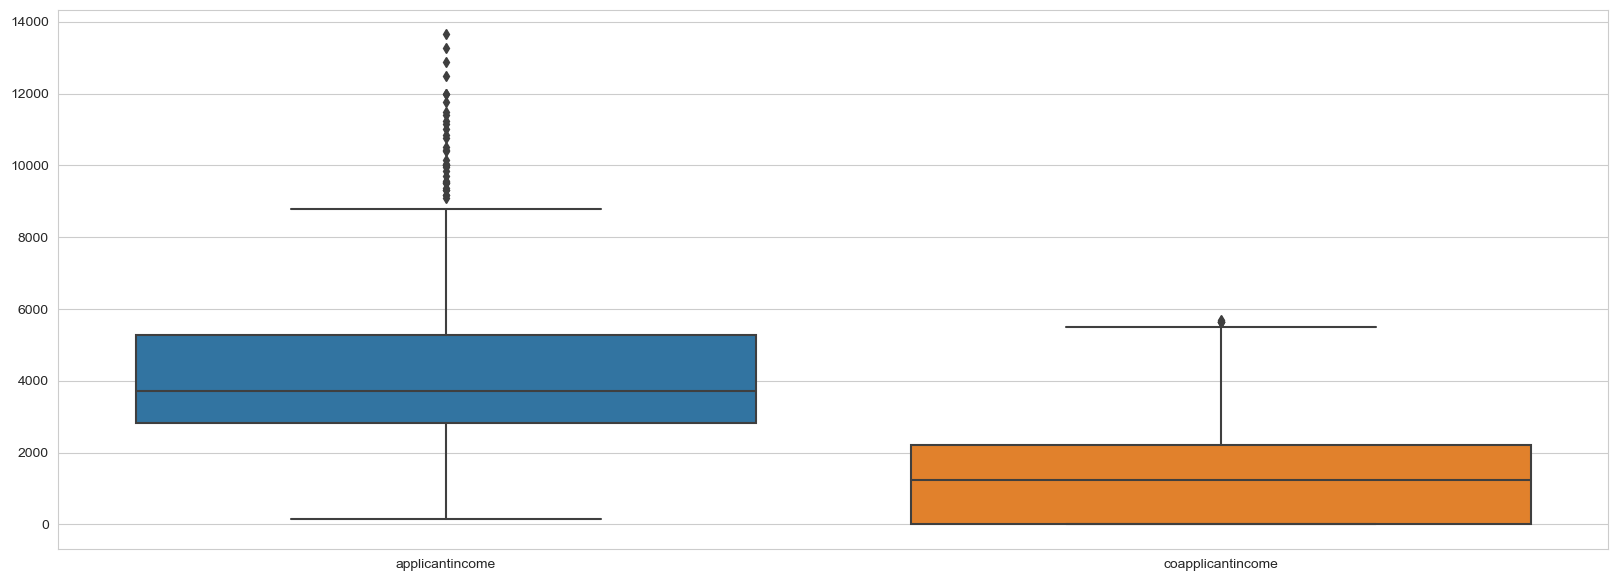

In [118]:
plt.figure(figsize=(20,7))
sns.boxplot(data=df_outs.loc[:,['applicantincome','coapplicantincome']])
plt.show()

#### There are 2 main ways to remove the outliers
<ul>
    <li>Using Z-score</li>
    <li>Using IQR</li>
</ul>

### Using Z-Score

In [30]:
threshold=1.5
df_outs = imputer_df.copy()
main_df = imputer_df.copy()
for col in ['applicantincome','coapplicantincome']:
    z=np.abs(stats.zscore(df_outs[col]))
    df_outs=df_outs[(z<threshold)]

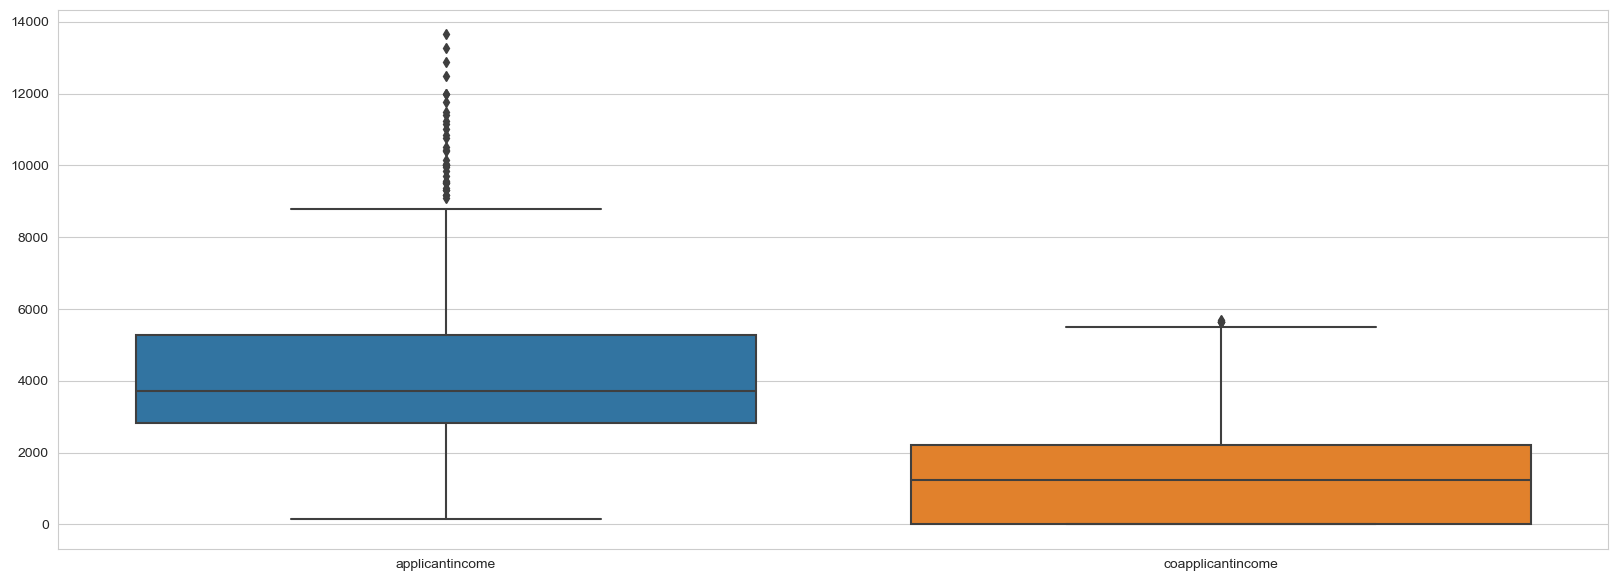

In [65]:
plt.figure(figsize=(20,7))
sns.boxplot(data=df_outs.loc[:,['applicantincome','coapplicantincome']])
plt.show()

In [66]:
# plt.figure(figsize=(20,7))
# sns.boxplot(data=df_outs.loc[:,['applicantincome','coapplicantincome']])
# plt.show()

#### Using IQR

In [68]:
df_out_iqr = imputer_df.copy()
for col in ['applicantincome','coapplicantincome']:
    q1 = np.percentile(df_out_iqr[col],25)
    q3 = np.percentile(df_out_iqr[col],75)
    iqr = q3-q1
    uqr = q3+1.5*iqr
    lqr = q1-1.5*iqr
    df_out_iqr = df_out_iqr.loc[(df_out_iqr[col]>=lqr) & (df_out_iqr[col]<=uqr)]


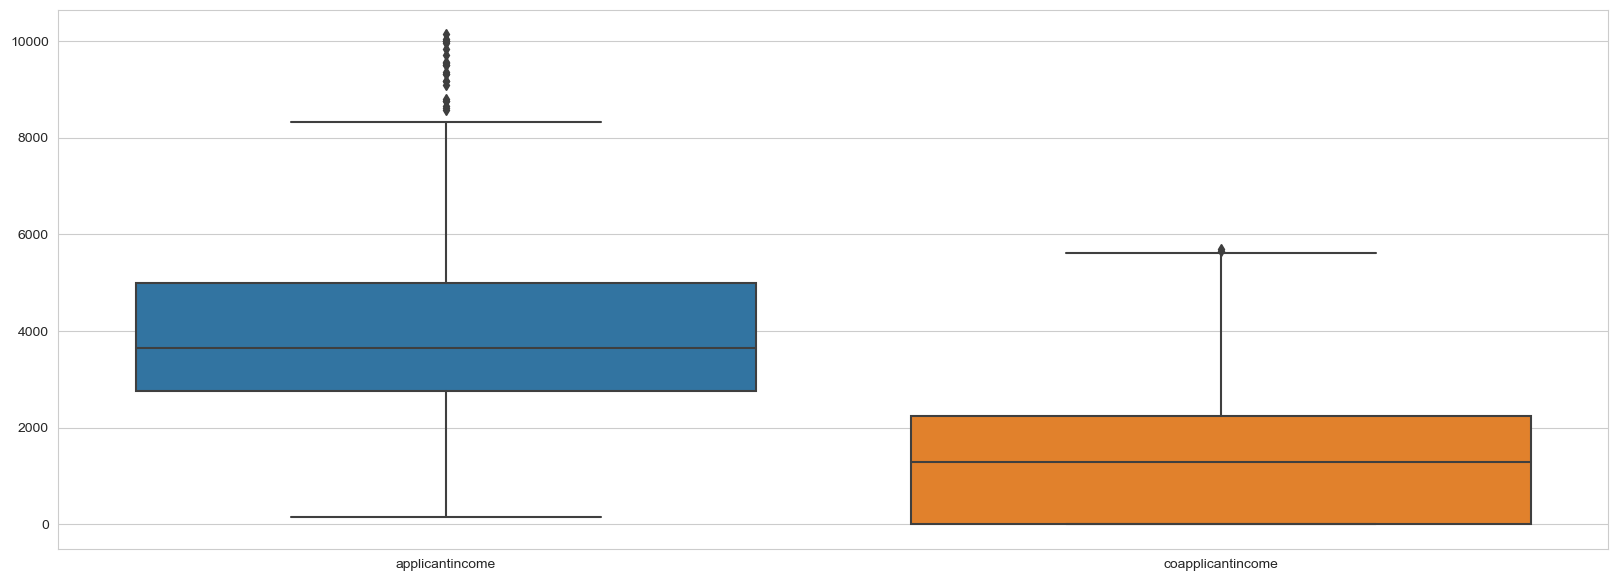

In [69]:
plt.figure(figsize=(20,7))
sns.boxplot(data=df_out_iqr.loc[:,['applicantincome','coapplicantincome']])
plt.show()

In [127]:
## We will be using the df_out_iqr

## Balancing the Dataset

In [70]:
df_out_iqr['loan_status'].value_counts()

1.0    380
0.0    168
Name: loan_status, dtype: int64

In [71]:
380 - 168

212

In [72]:
# Separate majority and minority classes
Final_loan_majority = df_out_iqr[df_out_iqr.loan_status==1]
Final_loan_minority = df_out_iqr[df_out_iqr.loan_status==0]

# Upsample minority class
Final_loan_minority_upsampled = resample(Final_loan_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=380,    # to match majority class
                                 random_state=123) 

In [73]:
loan_balanced = pd.concat([Final_loan_majority, Final_loan_minority_upsampled])
print(loan_balanced['loan_status'].value_counts())#checking number of O's and 1's in the target variable
print(loan_balanced.shape)#to print the number of rows and columns of the balanced dataframe

1.0    380
0.0    380
Name: loan_status, dtype: int64
(760, 12)


In [74]:
## Seperating features and Target Variable
X = loan_balanced.iloc[:,:-1]
y = loan_balanced.iloc[:,-1]

In [111]:
## Scaling 

In [76]:
normalize_cols = ['applicantincome','coapplicantincome','loanamount','loan_amount_term']
normalizer_dict = {}
for x in normalize_cols:
    norm = MinMaxScaler()
    X[x] = norm.fit_transform(np.array(X[x]).reshape((-1,1)))
    normalizer_dict[x] = norm


C:\Users\vaibh\AppData\Local\Temp\ipykernel_23472\2175129796.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[x] = norm.fit_transform(np.array(X[x]).reshape((-1,1)))
C:\Users\vaibh\AppData\Local\Temp\ipykernel_23472\2175129796.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[x] = norm.fit_transform(np.array(X[x]).reshape((-1,1)))
C:\Users\vaibh\AppData\Local\Temp\ipykernel_23472\2175129796.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [77]:
X

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area
0,1.0,0.0,0.0,0.0,0.0,0.570528,0.000000,0.378202,0.743590,1.0,2.0
2,1.0,1.0,0.0,0.0,1.0,0.285314,0.000000,0.155313,0.743590,1.0,2.0
3,1.0,1.0,0.0,1.0,0.0,0.243568,0.413612,0.302452,0.743590,1.0,2.0
4,1.0,0.0,0.0,0.0,0.0,0.585644,0.000000,0.359673,0.743590,1.0,2.0
5,1.0,1.0,2.0,0.0,1.0,0.527280,0.736011,0.702997,0.743590,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
63,1.0,1.0,1.0,0.0,0.0,0.480028,0.000000,0.330245,0.743590,0.0,0.0
358,1.0,1.0,0.0,1.0,0.0,0.285314,0.292229,0.247956,1.000000,0.0,2.0
410,0.0,0.0,1.0,1.0,1.0,0.372109,0.000000,0.144414,0.743590,1.0,1.0
139,1.0,1.0,2.0,1.0,0.0,0.405446,0.250833,0.326975,0.743590,1.0,0.0


In [78]:
X.describe()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area
count,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000
mean,0.821053,0.640789,0.846053,0.259211,0.211842,0.394829,0.234931,0.331631,0.706397,0.756579,1.047368
std,0.452868,0.488249,1.133388,0.438490,0.519569,0.187277,0.256696,0.145995,0.140950,0.421502,0.805363
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.261988,0.000000,0.242507,0.743590,0.800000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.345380,0.222768,0.313351,0.743590,1.000000,1.000000
75%,1.000000,1.000000,2.000000,1.000000,0.000000,0.485534,0.388221,0.405995,0.743590,1.000000,2.000000
max,2.000000,2.000000,4.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [79]:
## Splitting the data in 70:30 for train:test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [80]:
## Implementing number of data Classificaiton models

In [81]:

random_classifier = RandomForestClassifier(n_estimators=100)
random_classifier.fit(X_train,y_train)

RandomForestClassifier()

In [82]:
def testing_classifier(model):
    y_pred = model.predict(X_test)
    print(f"Accuracy Score {accuracy_score(y_test,y_pred)}")
    print(f"Classification Report \n {classification_report(y_test,y_pred)}")
#     plot_roc_curve(model, X_test, y_test)

In [83]:
testing_classifier(random_classifier) ## Random Forest 

Accuracy Score 0.8903508771929824
Classification Report 
               precision    recall  f1-score   support

         0.0       0.89      0.89      0.89       114
         1.0       0.89      0.89      0.89       114

    accuracy                           0.89       228
   macro avg       0.89      0.89      0.89       228
weighted avg       0.89      0.89      0.89       228



In [84]:
mean_accuracy = []
i = 1
kf = StratifiedKFold(n_splits=5, random_state=23, shuffle=True)
for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X.iloc[train_index], X.iloc[test_index]
    ytr, yvl = y.iloc[train_index], y.iloc[test_index]
 
    model = LogisticRegression(random_state=23,max_iter=1000)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    mean_accuracy.append(score)
    print('accuracy_score', score)
    i+=1


print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))
pred_test = model.predict(X_test)
confusion = confusion_matrix(pred_test,y_test)


1 of kfold 5
accuracy_score 0.6710526315789473

2 of kfold 5
accuracy_score 0.7236842105263158

3 of kfold 5
accuracy_score 0.7302631578947368

4 of kfold 5
accuracy_score 0.7171052631578947

5 of kfold 5
accuracy_score 0.7105263157894737

Mean validation accuracy:  0.7105263157894737


In [85]:
testing_classifier(model)

Accuracy Score 0.7236842105263158
Classification Report 
               precision    recall  f1-score   support

         0.0       0.88      0.52      0.65       114
         1.0       0.66      0.93      0.77       114

    accuracy                           0.72       228
   macro avg       0.77      0.72      0.71       228
weighted avg       0.77      0.72      0.71       228



In [86]:

#Create a Gaussian Classifier
gnb = GaussianNB()
# Train the model using the training sets
gnb.fit(X_train, y_train)

GaussianNB()

In [87]:
testing_classifier(gnb)

Accuracy Score 0.7105263157894737
Classification Report 
               precision    recall  f1-score   support

         0.0       0.93      0.46      0.61       114
         1.0       0.64      0.96      0.77       114

    accuracy                           0.71       228
   macro avg       0.78      0.71      0.69       228
weighted avg       0.78      0.71      0.69       228



In [88]:
## XGBoost Classifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [89]:
testing_classifier(xgb)

Accuracy Score 0.868421052631579
Classification Report 
               precision    recall  f1-score   support

         0.0       0.86      0.89      0.87       114
         1.0       0.88      0.85      0.87       114

    accuracy                           0.87       228
   macro avg       0.87      0.87      0.87       228
weighted avg       0.87      0.87      0.87       228



C:\Users\vaibh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\vaibh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\vaibh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be r

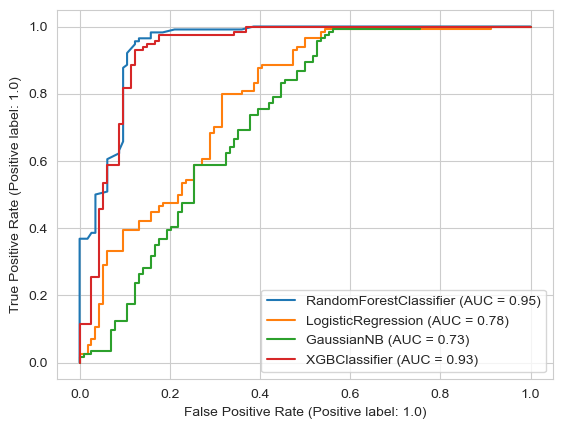

In [90]:
disp = plot_roc_curve(random_classifier, X_test, y_test)
plot_roc_curve(model, X_test, y_test,ax=disp.ax_)
plot_roc_curve(gnb, X_test, y_test,ax=disp.ax_)
plot_roc_curve(xgb, X_test, y_test,ax=disp.ax_)

## Ranking the importance  of features for Loan Status
As we have selected the random forest classifier we will be looking at the weightage/ ranking of the explanatory variables 

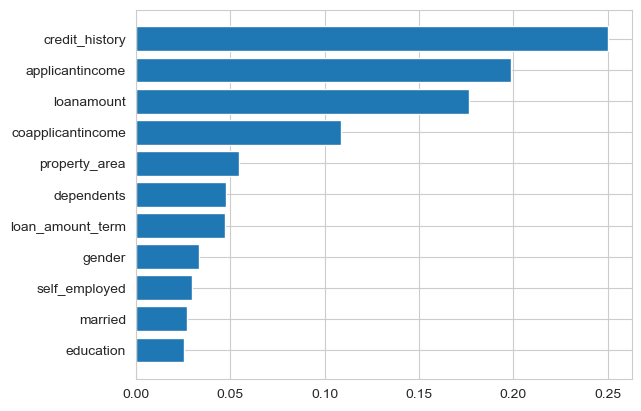

In [96]:
# extractinf the features
feat_imps = list(zip(X.columns,random_classifier.feature_importances_))
feat_imps.sort(key = lambda x : x[1])
plt.barh([x[0] for x in feat_imps],[x[1] for x in feat_imps])

plt.show()

As we can see that <i><b>Credit History</b></i>, <i><b>Applicant Income</b></i>, <i><b>Loan Amount</b></i>, and <i><b>Co-applicannt's imcome</b></i> are the main features that are influencing the loan status

### Checking the influence of outliers on the performance of the best model

In [102]:
outs_df

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,1.0,0.0,0.0,0.0,0.0,5849.0,0.0,147.8,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,4583.0,1508.0,128.0,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000.0,0.0,66.0,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583.0,2358.0,120.0,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.0,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,2900.0,0.0,71.0,360.0,1.0,0.0,1.0
610,1.0,1.0,3.0,0.0,0.0,4106.0,0.0,40.0,180.0,1.0,0.0,1.0
611,1.0,1.0,1.0,0.0,0.0,8072.0,240.0,253.0,360.0,1.0,2.0,1.0
612,1.0,1.0,2.0,0.0,0.0,7583.0,0.0,187.0,360.0,1.0,2.0,1.0


In [106]:
# Balancing the dataset

# Separate majority and minority classes
Final_loan_majority_out = outs_df[outs_df.loan_status==1]
Final_loan_minority_out = outs_df[outs_df.loan_status==0]

# Upsample minority class
Final_loan_minority_upsampled_out = resample(Final_loan_minority_out, 
                                 replace=True,     # sample with replacement
                                 n_samples=422,    # to match majority class
                                 random_state=123) 

In [107]:
loan_balanced_out = pd.concat([Final_loan_majority_out, Final_loan_minority_upsampled_out])
print(loan_balanced_out['loan_status'].value_counts())#checking number of O's and 1's in the target variable
print(loan_balanced_out.shape)#to print the number of rows and columns of the balanced dataframe

1.0    422
0.0    422
Name: loan_status, dtype: int64
(844, 12)


In [108]:
## Seperating features and Target Variable
X_out = loan_balanced_out.iloc[:,:-1]
y_out = loan_balanced_out.iloc[:,-1]

In [109]:
## Normalizing the dataframe
normalize_cols = ['applicantincome','coapplicantincome','loanamount','loan_amount_term']
normalizer_dict = {}
for x in normalize_cols:
    norm = MinMaxScaler()
    X_out[x] = norm.fit_transform(np.array(X_out[x]).reshape((-1,1)))
    normalizer_dict[x] = norm

C:\Users\vaibh\AppData\Local\Temp\ipykernel_23472\2196634647.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_out[x] = norm.fit_transform(np.array(X_out[x]).reshape((-1,1)))
C:\Users\vaibh\AppData\Local\Temp\ipykernel_23472\2196634647.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_out[x] = norm.fit_transform(np.array(X_out[x]).reshape((-1,1)))
C:\Users\vaibh\AppData\Local\Temp\ipykernel_23472\2196634647.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [112]:
## Splitting the data in 70:30 for train:test
X_train_out,X_test_out,y_train_out,y_test_out = train_test_split(X_out,y_out,test_size=0.3,random_state=23)

In [113]:
## Training the data on Random Forst Classifier
random_classifier_out = RandomForestClassifier(n_estimators=100)
random_classifier_out.fit(X_train_out,y_train_out)

RandomForestClassifier()

In [117]:
y_pred_out = model.predict(X_test_out)
print(f"Accuracy Score {accuracy_score(y_test_out,y_pred_out)}")
print(f"Classification Report \n {classification_report(y_test_out,y_pred_out)}")

Accuracy Score 0.7165354330708661
Classification Report 
               precision    recall  f1-score   support

         0.0       0.87      0.45      0.60       117
         1.0       0.67      0.94      0.78       137

    accuracy                           0.72       254
   macro avg       0.77      0.70      0.69       254
weighted avg       0.76      0.72      0.70       254



## Comparison of models

<table>
    <thead>
        <th>Dataset Used</th>
        <th>Accuracy</th>
        <th>Precision</th>
        <th>Recall</th>
        <th>F1-Score</th>
    </thead>
    <tbody>
        <tr>
            <td><b>Without Outliers</b></td>
          <td>89.03%</td>
          <td>89%</td>
          <td>89%</td>
          <td>89%</td>   
        </tr>
        <tr>
          <td><b>Including Outliers</b></td>
          <td>71%</td>
          <td>77%</td>
          <td>70%</td>
          <td>72%</td>   
        </tr>
    </tbody>
</table>